In [51]:
# Suppress Warning messages
import warnings
warnings.simplefilter(action='ignore')

In [52]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [53]:
PROBLEM_NAME = 'Queens'
ALGORITHM_NAME = 'GA'

In [54]:
PROBLEM_SIZE = 100

In [55]:
out_dir = f'metrics'
os.makedirs(out_dir, exist_ok=True)

In [56]:
all_df = pd.read_csv(f'metrics/{ALGORITHM_NAME.lower()}.csv')

In [57]:
all_df.columns

Index(['Iteration', 'Time', 'Fitness', 'FEvals', 'Population Size',
       'Mutation Rate', 'max_iters', 'problem_size', 'max_attempts',
       'run_number', 'group_timestamp', 'total_runtime', 'num_edges',
       'optimal_fitness'],
      dtype='object')

In [58]:
print(all_df['Mutation Rate'].unique())
print(all_df['Population Size'].unique())

[0.1 0.3 0.5 0.7]
[ 10  20  50 100]


In [59]:
all_df = all_df[all_df['Mutation Rate'].isin([0.1, 0.3, 0.5])]
all_df = all_df[all_df['Population Size'].isin([10, 50, 100])]

In [60]:
all_df['X'] = all_df.apply(lambda row: f"Pop={int(row['Population Size'])}, Mut={row['Mutation Rate']}", axis=1)

In [61]:
all_df['X'].unique()

array(['Pop=10, Mut=0.1', 'Pop=50, Mut=0.1', 'Pop=100, Mut=0.1',
       'Pop=10, Mut=0.3', 'Pop=50, Mut=0.3', 'Pop=100, Mut=0.3',
       'Pop=10, Mut=0.5', 'Pop=50, Mut=0.5', 'Pop=100, Mut=0.5'],
      dtype=object)

In [62]:
def get_color(X):
    if 'Mut=0.1' in X:
        return 'red'
    elif 'Mut=0.3' in X:
        return 'blue'
    elif 'Mut=0.5' in X:
        return 'green'
def get_style(X):
    if 'Pop=10,' in X:
        return 'dotted'
    elif 'Pop=50,' in X:
        return '--'
    elif 'Pop=100,' in X:
        return '-'

In [63]:
metrics = {}

def sort_key(X):
    n = int(X.split(',')[0].split('=')[1])
    return n

for group in sorted(all_df['X'].unique(), key=sort_key):
    df = all_df[all_df['X'] == group]
    assert(len(df['group_timestamp'].unique()) == 1)
    last_iter = df['Iteration'].max()
    metrics[group] = {
        'iter': [],
        'fitness_mean': [],
        'fitness_std': [],
    }
    for iter_i in range(1, last_iter+1):
        iter_df = df[df['Iteration'] == iter_i]
        metrics[group]['iter'].append(iter_i)
        metrics[group]['fitness_mean'].append(iter_df['Fitness'].mean())
        metrics[group]['fitness_std'].append(iter_df['Fitness'].std())

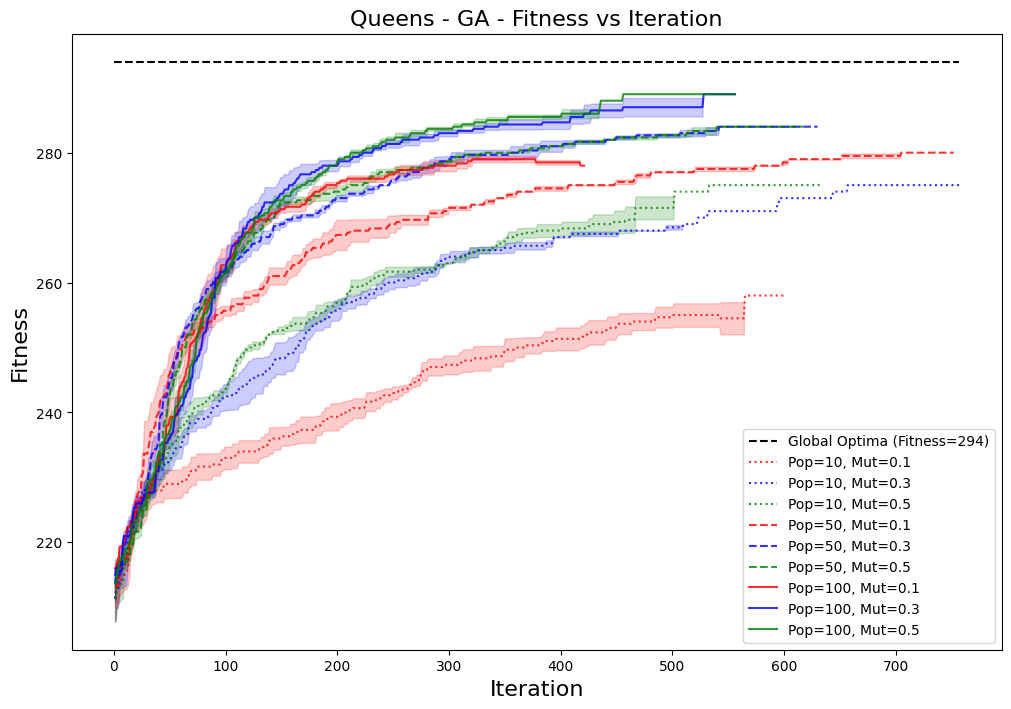

In [64]:
fontsize = 16
plt.figure(figsize=(12, 8))
last_iter = all_df['Iteration'].max()
plt.hlines(294, 0, last_iter, color='black', linestyle='dashed', alpha=1.0, label='Global Optima (Fitness=294)')
for group in metrics:
    linestyle = get_style(group)
    color = get_color(group)
    plt.plot(metrics[group]['iter'], metrics[group]['fitness_mean'], label=group, color=color, linestyle=linestyle, alpha=0.8)
    mean = np.array(metrics[group]['fitness_mean'])
    std = np.array(metrics[group]['fitness_std']) / 2
    lower = mean - std
    upper = mean + std 
    plt.fill_between(metrics[group]['iter'], lower, upper, alpha=0.2, color=color)
plt.title(f'{PROBLEM_NAME} - {ALGORITHM_NAME} - Fitness vs Iteration', fontsize=fontsize)
plt.xlabel('Iteration', fontsize=fontsize)
plt.ylabel('Fitness', fontsize=fontsize)
plt.legend()
plt.savefig(f'{out_dir}/{PROBLEM_NAME}_{ALGORITHM_NAME.lower()}_fitness_vs_iteration.png')